<a href="https://colab.research.google.com/github/smucon-dev/ml_basics/blob/main/Perceptron_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets

**Generate two clusters of datapoints**

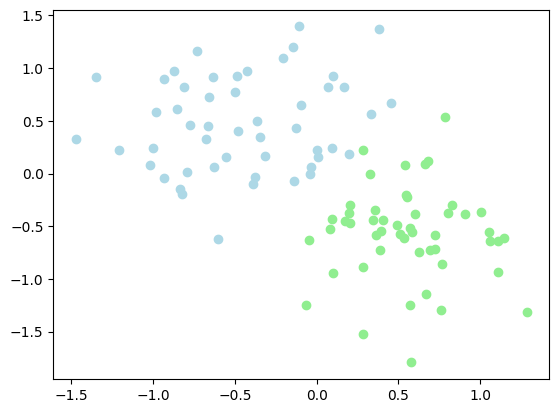

In [3]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, centers=centers, random_state=123, cluster_std=0.4)

def plt_datapoints():
  plt.scatter(X[y==0, 0], X[y==0, 1], color='lightblue')
  plt.scatter(X[y==1, 0], X[y==1, 1], color='lightgreen')

plt_datapoints()

# convert numpy array to tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

**Create a Model class**

In [4]:
class Model(nn.Module):

  def __init__(self, input_size, output_size) -> None:
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

**Create a model with two inputs and one output**

In [5]:
torch.manual_seed(2) # for consistent results
model = Model(2, 1)
# print(list(model.parameters()))

**Reshape parameter tensors. Extract python values of weights and bias for plotting.**

In [6]:
[w, b] = model.parameters()
w1, w2 = w.view(2)

def get_params():
  return w1.item(), w2.item(), b[0].item()

# get_params()

**Draw classifier line** (before training the model)

x1: [-2.  2.] x2: [-0.77551074  3.08020252]


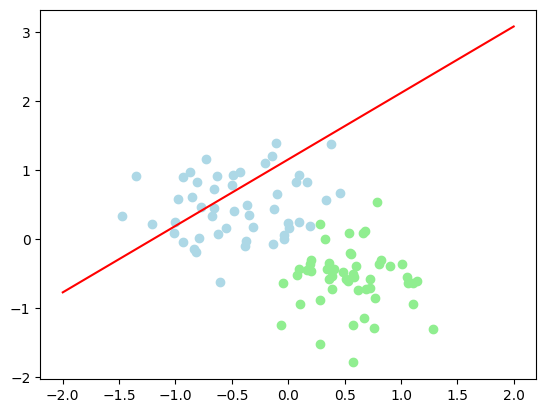

In [7]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1 * x1 + b1) / -w2
  print('x1:', x1, 'x2:', x2)
  plt.plot(x1, x2, 'r-')
  plt_datapoints()

plot_fit('Model before Training')

**Train the model**

In [9]:
criterion = nn.BCELoss() # binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # stochastic gradient descent with learning rate 0.01

epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('epoch:', i, 'loss:', loss.item())

  losses.append(loss.item())
  optimizer.zero_grad() # need to reset the gradient each time to avoid accumulation
  loss.backward() # calculate gradient
  optimizer.step() # update weights


epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6164200305938721
epoch: 3 loss: 0.6153795123100281
epoch: 4 loss: 0.6143423318862915
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.612278401851654
epoch: 7 loss: 0.6112515330314636
epoch: 8 loss: 0.6102280020713806
epoch: 9 loss: 0.6092078685760498
epoch: 10 loss: 0.6081911325454712
epoch: 11 loss: 0.607177734375
epoch: 12 loss: 0.6061676740646362
epoch: 13 loss: 0.6051609516143799
epoch: 14 loss: 0.6041575074195862
epoch: 15 loss: 0.6031573414802551
epoch: 16 loss: 0.6021605730056763
epoch: 17 loss: 0.6011670231819153
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.5991896986961365
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972253680229187
epoch: 22 loss: 0.5962480306625366
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943029522895813
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923705697059631
epoch: 27 loss: 0.5914091467857361
epoch: 28 loss: 0.5904508233070374
e

**Plot loss curve**

Text(0.5, 0, 'epochs')

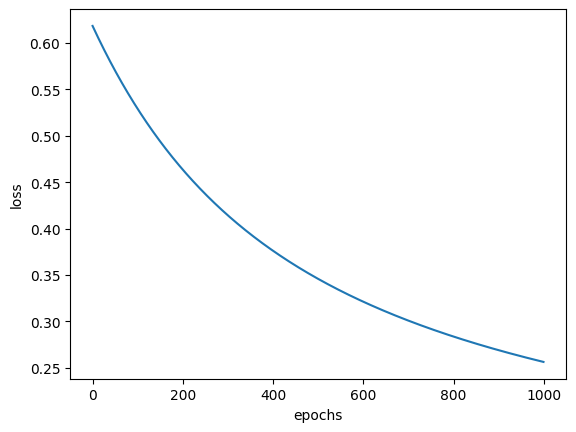

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

**Draw classifier line after training**

x1: [-2.  2.] x2: [-2.05822789  1.96188429]


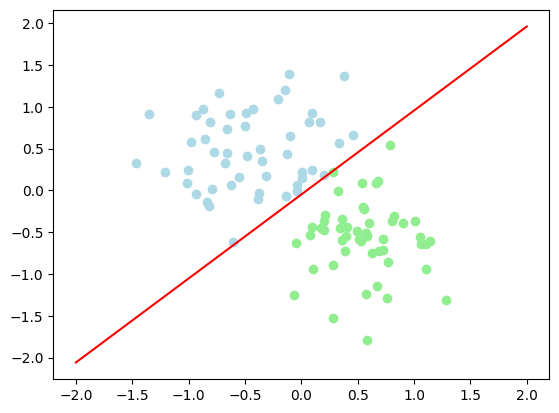

In [13]:
plot_fit('After Training')

**Predict two new data points**

x1: [-2.  2.] x2: [-2.05822789  1.96188429]
Blue point probabilty: 0.18230435252189636


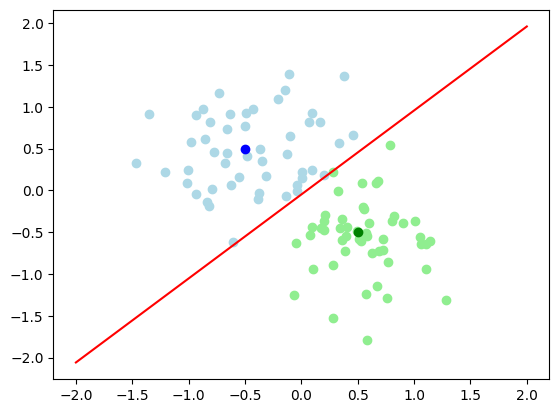

In [22]:
p1 = torch.Tensor([0.5, -0.5])
p2 = torch.Tensor([-0.5, 0.5])
plt.plot(p1.numpy()[0], p1.numpy()[1], 'go')
plt.plot(p2.numpy()[0], p2.numpy()[1], 'bo')
plot_fit('Prediction')

In [25]:
print(f'Green point probabilty:', model.forward(p1).item())
print(f'Blue point probabilty:', model.forward(p2).item())
print(f'Green point prediction:', model.predict(p1))
print(f'Blue point prediction:', model.predict(p2))

Green point probabilty: 0.7962783575057983
Blue point probabilty: 0.18230435252189636
Green point prediction: 1
Blue point prediction: 0
